In [1]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('/jupyter_home/data/S-DoT_NATURE_2021.12.27-01.02.csv')
df2 = pd.read_csv('/jupyter_home/data/S-DoT_NATURE_2022.03.14-03.20.csv')
df3 = pd.read_csv('/jupyter_home/data/S-DoT_NATURE_2022.04.18-04.24.csv')


In [2]:
nature = pd.concat([df1,df2,df3])
# display(nature)
nature.info()
nature.reset_index(drop=False,inplace=True)
# display(nature)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509394 entries, 0 to 168930
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   기관 명           509394 non-null  object 
 1   모델명            509394 non-null  object 
 2   시리얼            509394 non-null  object 
 3   구분             509394 non-null  int64  
 4   초미세먼지(㎍/㎥)     509394 non-null  int64  
 5   미세먼지(㎍/㎥)      509394 non-null  int64  
 6   기온(℃)          508987 non-null  float64
 7   상대습도( %)       508987 non-null  float64
 8   풍향(°)          27298 non-null   float64
 9   풍속(m/s)        27298 non-null   float64
 10  돌풍 풍향(°)       27298 non-null   float64
 11  돌풍 풍속(m/s)     27298 non-null   float64
 12  조도(lux)        418707 non-null  float64
 13  자외선(UVI)       418564 non-null  float64
 14  소음(dB)         506902 non-null  float64
 15  진동_x(g)        416988 non-null  float64
 16  진동_y(g)        416988 non-null  float64
 17  진동_z(g)        416988 non-nul

In [3]:
df = pd.DataFrame(np.random.randint(150,7000,size=(509394,1)),columns=['co2'])
display(df)

,co2
0,6589
1,1920
2,1536
3,5109
4,184
...,...
509389,3987
509390,3109
509391,2622
509392,1311


In [4]:
result = pd.concat([nature,df],axis=1)
# display(result)
new = result[['기온(℃)','상대습도( %)','co2']]
new.dropna(axis=0)
display(new)

,기온(℃),상대습도( %),co2
0,-11.3,47.0,6589
1,-10.2,44.0,1920
2,-10.1,42.0,1536
3,-10.2,42.0,5109
4,-10.6,44.0,184
...,...,...,...
509389,17.6,84.0,3987
509390,17.6,86.0,3109
509391,17.5,85.0,2622
509392,17.7,81.0,1311


In [5]:
# new.isnull().sum()
# new.describe()
new = new.dropna(axis=0)
new.isnull().sum()

기온(℃)       0
상대습도( %)    0
co2         0
dtype: int64

In [6]:
new.describe()

,기온(℃),상대습도( %),co2
count,508987.000000,508987.000000,508987.000000
mean,8.189722,56.013607,3579.637828
std,9.018041,19.180803,1978.681564
min,-40.000000,6.000000,150.000000
25%,0.900000,42.000000,1866.000000
50%,8.800000,55.000000,3587.000000
75%,15.200000,70.000000,5295.000000
max,34.600000,100.000000,6999.000000


In [7]:
# 0 : 잔다, 1 : 안잔다
# 습도 50~60 -> 0
# co2 : 1500이상 -> 0
# 기온 : 20~23 -> 1

# if (new['기온(℃)']<20) | (new['기온(℃)'] > 23):
#     if (new['co2'] >= 1500):
#         if ((new['상대습도( %)']>=50) & (new['상대습도( %)']<=60)):
#             new['label'] = 0
# else :
#     new['label'] = 1
    
# display(new)

new['label'] = np.where(((new['기온(℃)']<20) | (new['기온(℃)']>23)) & (new['co2'] >= 1500) & ((new['상대습도( %)']>=50) & (new['상대습도( %)']<=60)), 0, 1)


In [8]:
display(new)
new.to_csv('nature_data.csv')

,기온(℃),상대습도( %),co2,label
0,-11.3,47.0,6589,1
1,-10.2,44.0,1920,1
2,-10.1,42.0,1536,1
3,-10.2,42.0,5109,1
4,-10.6,44.0,184,1
...,...,...,...,...
509389,17.6,84.0,3987,1
509390,17.6,86.0,3109,1
509391,17.5,85.0,2622,1
509392,17.7,81.0,1311,1


In [9]:
import matplotlib.pyplot as plt

new['label'].value_counts()

1    423302
0     85685
Name: label, dtype: int64

In [ ]:
# zscore_threshold = 2.0

# for col in ['기온(℃)','상대습도( %)','co2']:
#     outlier = new[col][np.abs(stats.zscore(new[col])) > zscore_threshold]
#     new = new.loc[~new[col].isin(outlier)]

In [10]:
new = new.drop(new.loc[new['기온(℃)'] < -20].index)

In [11]:
new.describe()

,기온(℃),상대습도( %),co2,label
count,507992.000000,507992.000000,507992.000000,507992.000000
mean,8.282168,55.996262,3579.630658,0.831529
std,8.779559,19.168782,1978.644076,0.374285
min,-19.900000,6.000000,150.000000,0.000000
25%,0.900000,42.000000,1866.000000,1.000000
50%,8.800000,55.000000,3587.000000,1.000000
75%,15.200000,70.000000,5295.000000,1.000000
max,34.600000,100.000000,6999.000000,1.000000


In [12]:
x_data = new[['기온(℃)','상대습도( %)','co2']]
t_data = new['label']

<BarContainer object of 2 artists>

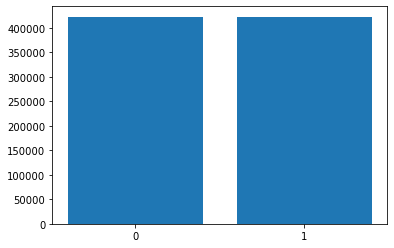

In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_data,t_data = ros.fit_resample(x_data,t_data)

# plt.bar(x_data, t_data)
plt.bar(['0','1'],t_data.value_counts())

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_data)

norm_x_data = scaler.transform(x_data)
print(norm_x_data)

[[0.15779817 0.43617021 0.94013725]
 [0.17798165 0.40425532 0.25843189]
 [0.17981651 0.38297872 0.20236531]
 ...
 [0.31192661 0.57446809 0.45904512]
 [0.60183486 0.5        0.73893999]
 [0.57614679 0.56382979 0.57220032]]


In [31]:
from sklearn.model_selection import train_test_split

train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(x_data,
                 t_data,
                 test_size = 0.2,
                 random_state=2,
                 stratify=t_data)
print(train_x_data.shape, train_t_data.shape) 

(675856, 3) (675856,)


In [32]:
from sklearn import linear_model

model = linear_model.LogisticRegression()

model.fit(train_x_data, train_t_data)
test_score = model.score(test_x_data, test_t_data)
print(test_score) # accuracy

# my_score = np.array([[25,60,4000]])
# predict_val = model.predict(my_score)    # 0 or 1로 결과 도출
# predict_proba = model.predict_proba(my_score) # 확률값으로 결과를 도출

# print('sklearn의 결과 : 합격여부 : {}, 확률 : {}'.format(predict_val, 
#                                                         predict_proba))

0.5734180062025047
